# Logistic Regression

**Logistic Regression** is a statistical method used for modeling the probability of a binary outcome. It's a type of generalized linear model (GLM) that predicts the probability that a given instance belongs to a particular category. Despite its name, logistic regression is used for binary classification problems, not regression problems.

Key Points:
1. **Sigmoid Function**: At its core, logistic regression uses the logistic (or sigmoid) function to squeeze the output of a linear equation between 0 and 1, which can then be interpreted as a probability.

2. **Applications**: Logistic regression is widely used in fields like medicine (e.g., predicting whether a patient has a disease or not), finance (e.g., predicting loan default), and marketing (e.g., predicting customer churn).

3. **Assumptions**: Logistic regression assumes linearity of independent variables and log odds, absence of multicollinearity, and that the outcome variable is binary.

4. **Extensions**: For outcomes with more than two categories, extensions of logistic regression like multinomial and ordinal logistic regression are used.

Logistic regression provides a simple yet powerful way to determine the effect of multiple predictors on a binary outcome, and it's a foundational algorithm in the world of machine learning and statistics.

In [3]:
# Import necessary libraries/modules

# Load the digits dataset
from sklearn.datasets import load_digits

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the logistic regression model
from sklearn.linear_model import LogisticRegression

# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import seaborn for enhanced data visualization
import seaborn as sns

# Import metrics for evaluating the model
from sklearn import metrics

# Import numpy for numerical operations
import numpy as np

In [2]:
# Load the digits dataset and store it in the 'digits' variable
digits = load_digits()

# Print the shape of the image data and label data
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [3]:
# Create a Logistic Regression model instance
logisticRegr = LogisticRegression(max_iter=10000)

# Fit (train) the Logistic Regression model using the training data
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [4]:
# Predict the label for a single test sample (reshaped to match model input shape)
logisticRegr.predict(x_test[0].reshape(1, -1))

# Predict labels for the first 10 test samples
logisticRegr.predict(x_test[0:10])

# Predict labels for all test samples and store them in the 'predictions' variable
predictions = logisticRegr.predict(x_test)

# Calculate the accuracy score of the model on the test data
score = logisticRegr.score(x_test, y_test)

# Print the accuracy score
print(score)

# Calculate the confusion matrix to evaluate model performance
cm = metrics.confusion_matrix(y_test, predictions)

# Print the confusion matrix
print(cm)

0.9733333333333334
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 36  1  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  2  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0 57  1  0  0  1]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  1  0 40  0  0]
 [ 0  0  0  0  0  1  0  0 37  0]
 [ 0  0  0  1  0  0  0  0  1 46]]


In [1]:
from sklearn.datasets import fetch_openml
x_org, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Print the shape of the data (images) and target (labels)
print(x_org.shape)    # Shape of the data (images)
print(y.shape)  # Shape of the target (labels)

C:\Users\gaoye\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000,)


In [4]:
# Split the MNIST dataset into training and testing sets
# `train_img` contains the training data (images)
# `test_img` contains the testing data (images)
# `train_lbl` contains the training labels
# `test_lbl` contains the testing labels
train_img, test_img, train_lbl, test_lbl = train_test_split(x_org, y, test_size=1/7.0, random_state=0)

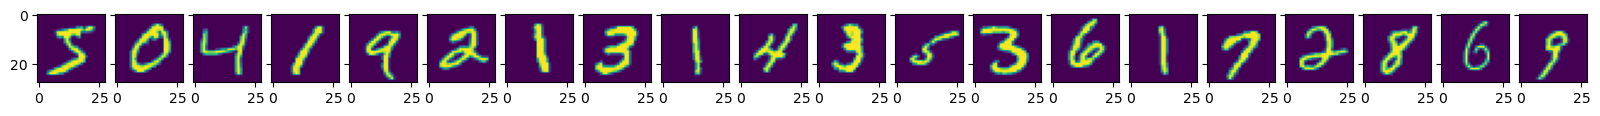

In [5]:
from mpl_toolkits.axes_grid1 import ImageGrid
def plot_digits(data):
    num_plots = data.shape[0]
    fig = plt.figure(figsize=(num_plots, 10.*num_plots))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, num_plots), axes_pad=0.1)  #makes a grid of images
    for i in range(num_plots):
        grid[i].imshow(data.iloc[i].values.reshape((28,28)))
    plt.show()
plot_digits(x_org[:20])

In [6]:
# Create a Logistic Regression model instance with the 'saga' solver
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=200)

# Fit (train) the Logistic Regression model using the training data
logisticRegr.fit(train_img, train_lbl)

C:\Users\gaoye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [7]:
# Predict labels for the first 10 test images
# logisticRegr.predict(test_img[0:10])

# Predict labels for all test images and store them in the 'predictions' variable
predictions = logisticRegr.predict(test_img)

In [8]:
# Calculate the accuracy score of the model on the test data
score = logisticRegr.score(test_img, test_lbl)

# Print the accuracy score
print(score)

0.9177
